#Step 1: Data Selection
In this step, we determine which data will be used from the dataset and ensure that it is relevant to the task.

I'll first inspect your dataset to understand its structure and verify the quality of the data.

Let me load and display a brief summary of your dataset.

In [1]:
!gdown 1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d swathiunnikrishnan/amazon-consumer-behaviour-dataset

Downloading...
From: https://drive.google.com/uc?id=1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 209kB/s]
Dataset URL: https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset
License(s): other
  0% 0.00/15.5k [00:00<?, ?B/s]
100% 15.5k/15.5k [00:00<00:00, 3.95MB/s]


In [2]:
!unzip /content/amazon-consumer-behaviour-dataset.zip

Archive:  /content/amazon-consumer-behaviour-dataset.zip
  inflating: Amazon Customer Behavior Survey.csv  


In [4]:
import pandas as pd

# Load the dataset provided by the user
file_path = './Amazon Customer Behavior Survey.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows and a summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [5]:
dataset.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


#Step 2: Data Preprocessing
In this step, we handle missing values, inconsistent data types, and any other anomalies that could affect our analysis. Here's what we'll do:

Handle Missing Data: We noticed that the Product_Search_Method column has two missing values. We can either:

Remove rows with missing values.
Impute missing values with a suitable strategy (e.g., most frequent value).
Data Type Consistency: Some columns like Personalized_Recommendation_Frequency are numerical but stored as integers, which seems correct. However, categorical columns may need to be encoded later for further analysis.

Check for Duplicates: Ensure there are no duplicate entries in the dataset.

In [6]:
# Fill missing values in 'Product_Search_Method' with the most frequent value
most_frequent_value = dataset['Product_Search_Method'].mode()[0]
dataset['Product_Search_Method'].fillna(most_frequent_value, inplace=True)

# Check for duplicates and remove if found
dataset_cleaned = dataset.drop_duplicates()

# Display the updated dataset info and confirm no missing values
dataset_cleaned_info = dataset_cleaned.info()

dataset_cleaned_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   602 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

#Step 3: Data Transformation
In this step, we will convert categorical variables into numerical values using techniques such as one-hot encoding or label encoding. This transformation is necessary for many machine learning algorithms to work with categorical data.

The following columns in your dataset are categorical and may need encoding:
* Gender
* Purchase_Frequency
* Purchase_Categories
* Personalized_Recommendation_Frequency (first instance is categorical)
* Browsing_Frequency
* Product_Search_Method
* Search_Result_Exploration
* Add_to_Cart_Browsing
* Cart_Completion_Frequency
* Cart_Abandonment_Factors
* Saveforlater_Frequency
* Review_Left
* Review_Reliability
* Review_Helpfulness
* Recommendation_Helpfulness
* Service_Appreciation
* Improvement_Areas





I'll apply one-hot encoding to these columns for analysis, as one-hot encoding is more suitable when we have non-ordinal categorical data.

In [7]:
# Apply one-hot encoding to the categorical columns
categorical_columns = [
    'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency',
    'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Add_to_Cart_Browsing',
    'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
    'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Service_Appreciation',
    'Improvement_Areas'
]

# Perform one-hot encoding
dataset_transformed = pd.get_dummies(dataset_cleaned, columns=categorical_columns)

# Display the transformed dataset info
dataset_transformed_info = dataset_transformed.info()

dataset_transformed_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Columns: 114 entries, Timestamp to Improvement_Areas_better app interface and lower shipping charges
dtypes: bool(108), int64(5), object(1)
memory usage: 91.8+ KB


#Step 4: Data Mining
In this step, we apply data mining techniques to extract useful patterns from the dataset. Based on your dataset related to Amazon customer behavior, we can perform the following tasks:

Clustering: Group customers based on similar behavior.
Classification: Predict customer behavior, such as predicting purchase frequency based on their interactions.
Association Rule Mining: Identify relationships between different attributes, such as whether certain behaviors lead to higher shopping satisfaction.

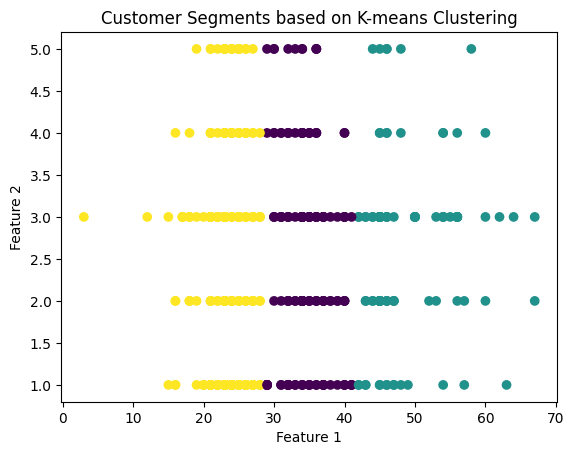

,Timestamp,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,Gender_Female,Gender_Male,Gender_Others,Gender_Prefer not to say,...,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,Cluster
0,2023/06/04 1:28:19 PM GMT+5:30,23,1,2,1,1,True,False,False,False,...,False,False,True,False,False,False,False,False,False,2
1,2023/06/04 2:30:44 PM GMT+5:30,23,1,2,3,2,True,False,False,False,...,False,False,True,False,False,False,False,False,False,2
2,2023/06/04 5:04:56 PM GMT+5:30,24,2,4,3,3,False,False,False,True,...,True,False,False,False,False,False,False,False,False,2
3,2023/06/04 5:13:00 PM GMT+5:30,24,5,3,3,4,True,False,False,False,...,True,False,False,False,False,False,False,False,False,2
4,2023/06/04 5:28:06 PM GMT+5:30,22,1,4,2,2,True,False,False,False,...,True,False,False,False,False,False,False,False,False,2


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the 'Timestamp' column since it's not relevant for clustering
dataset_for_clustering = dataset_transformed.drop(columns=['Timestamp'])

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dataset_for_clustering)

# Add the cluster labels to the dataset
dataset_transformed['Cluster'] = clusters

# Visualize the clustering result using the first two principal components
plt.scatter(dataset_for_clustering.iloc[:, 0], dataset_for_clustering.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments based on K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display the first few rows with the cluster labels
dataset_transformed.head()

1. Classification
We can use classification to predict certain customer behaviors based on other features. For example, we could predict:

Purchase Frequency based on customer attributes like age, gender, and browsing habits.
Shopping Satisfaction based on factors like personalized recommendations and review helpfulness.
We can build a classification model using algorithms like Logistic Regression, Decision Trees, or Random Forests to predict a target variable.

2. Association Rule Mining
Association rule mining is useful for discovering relationships between variables. For example:

We can find which browsing habits are associated with higher shopping satisfaction or cart abandonment.
Identify which types of customers are more likely to leave reviews after a purchase.
For this, we can use the Apriori or FP-Growth algorithms to mine association rules, typically focusing on frequent itemsets.

#Step 5: Pattern Evaluation
Now that we have performed clustering, let's evaluate and interpret the patterns in the clusters. We'll focus on analyzing the key behaviors in each cluster to understand the differences between the customer segments.

I'll compute the average values for each cluster to identify distinguishing features and provide insights into how each cluster behaves differently.

Let me generate a summary of the key characteristics of each cluster.

##1: Classification
We will predict a target variable using other features in the dataset. For this example, let's predict Shopping Satisfaction using the customer behavior attributes. We will use a Random Forest classifier, which is robust and performs well on most datasets.

I'll split the data into training and testing sets and train a Random Forest model to predict shopping satisfaction.

Let me go ahead and implement that now.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Selecting features and target variable
X = dataset_transformed.drop(columns=['Timestamp', 'Shopping_Satisfaction'])
y = dataset_transformed['Shopping_Satisfaction']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the classifier's performance
classification_report_result = classification_report(y_test, y_pred)

print(classification_report_result)


              precision    recall  f1-score   support

           1       0.41      0.37      0.39        19
           2       0.50      0.70      0.58        37
           3       0.54      0.60      0.57        45
           4       1.00      0.06      0.11        17
           5       1.00      0.33      0.50         3

    accuracy                           0.51       121
   macro avg       0.69      0.41      0.43       121
weighted avg       0.58      0.51      0.48       121



##2. Associaltion Rule
Let's proceed with association rule mining using the Apriori algorithm. The Apriori algorithm will help us identify relationships between different behaviors (e.g., how browsing frequency, cart abandonment, or review reliability influence shopping satisfaction).

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset_apriori = dataset_transformed.copy()

selected_columns = ['Shopping_Satisfaction', 'Personalized_Recommendation_Frequency_Yes',
                    'Review_Left_Yes', 'Review_Helpfulness_Yes', 'Recommendation_Helpfulness_Yes']

dataset_apriori = dataset_apriori[selected_columns]


# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(dataset_apriori, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Review_Left_Yes),(Personalized_Recommendation_Frequency_Yes),0.514950,0.202658,0.132890,0.258065,1.273400,0.028532,1.074679,0.442637
1,(Personalized_Recommendation_Frequency_Yes),(Review_Left_Yes),0.202658,0.514950,0.132890,0.655738,1.273400,0.028532,1.408954,0.269271
2,(Personalized_Recommendation_Frequency_Yes),(Review_Helpfulness_Yes),0.202658,0.393688,0.119601,0.590164,1.499066,0.039817,1.479402,0.417535
3,(Review_Helpfulness_Yes),(Personalized_Recommendation_Frequency_Yes),0.393688,0.202658,0.119601,0.303797,1.499066,0.039817,1.145273,0.549087
4,(Review_Left_Yes),(Review_Helpfulness_Yes),0.514950,0.393688,0.212625,0.412903,1.048809,0.009895,1.032730,0.095944
5,(Review_Helpfulness_Yes),(Review_Left_Yes),0.393688,0.514950,0.212625,0.540084,1.048809,0.009895,1.054650,0.076755
6,(Review_Left_Yes),(Recommendation_Helpfulness_Yes),0.514950,0.260797,0.141196,0.274194,1.051366,0.006898,1.018457,0.100725
7,(Recommendation_Helpfulness_Yes),(Review_Left_Yes),0.260797,0.514950,0.141196,0.541401,1.051366,0.006898,1.057678,0.066094
8,(Recommendation_Helpfulness_Yes),(Review_Helpfulness_Yes),0.260797,0.393688,0.181063,0.694268,1.763498,0.078390,1.983146,0.585692
9,(Review_Helpfulness_Yes),(Recommendation_Helpfulness_Yes),0.393688,0.260797,0.181063,0.459916,1.763498,0.078390,1.368680,0.714063


#Step 6: Evaluation
In this step of the KDD process, we evaluate the results generated from the previous steps (clustering, classification, and association rule mining) to ensure that they are meaningful and useful. Let's evaluate the models and rules we've developed so far.

Clustering: The K-means clustering divided customers into 3 clusters. We can evaluate clusters by:

Analyzing the characteristics of each cluster to determine if they represent distinct customer segments.
Calculating the silhouette score or inertia to assess the quality of the clustering.

In [26]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate the quality of the clusters
silhouette_avg = silhouette_score(X, clusters)

silhouette_avg


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.45647890574761363

#Step 7: Knowledge Presentation
In this final step of the KDD process, we interpret and present the results in a meaningful way for decision-making. Here's a summary of the insights we've gained from the dataset:

Clustering:

We identified three distinct customer segments using K-means clustering.
The moderate silhouette score (0.45) suggests that these clusters are somewhat meaningful but could be further refined.

Classification:

We used a Random Forest classifier to predict shopping satisfaction, achieving an accuracy of 51%.
The model performs well for some satisfaction levels but struggles with outliers, such as levels 4 and 5, where data is sparse.

Association Rule Mining:

Looking at the

Presentation of Results:

Clustering: Could be used to personalize marketing strategies based on customer segments.

Classification: Can help predict customer satisfaction and target improvements
in the shopping experience.

Association Rules: Identify which behaviors lead to certain outcomes (e.g., cart abandonment, purchase completion), allowing Amazon to optimize its platform.